In [5]:
import os
import sys
import glob
import pysam 
import mygene
import functools
import matplotlib
import numpy as np
import pandas as pd

#bam_filepath = glob.glob('/Users/vikas/mount/vpeddu/platypus_run/bigboi/hisat2/*.bam')
bam_filepath = '/Users/vikas/mount2/vpeddu/platypus_run/bigboi/hisat2/F_S14_L002.sorted.bam'
bamfile = pysam.AlignmentFile(bam_filepath, "rb")

bed_filepath = '/Users/vikas/Documents/UCSC/rotations/Brooks/rotation_project/U2AF1-allele-bias/test_bams/hg38.sorted.bed.gz'

bedfile = pysam.TabixFile(bed_filepath)

files = []
primary_u2af1 = []
primary_newgene = []

In [3]:
import os
import sys
import glob
import pysam 
import mygene
import matplotlib
import numpy as np
import pandas as pd

bam_files = glob.glob('/Users/vikas/mount2/vpeddu/platypus_run/bigboi/hisat2/*.bam')
#bam_filepath = '/Users/vikas/mount/vpeddu/platypus_run/bigboi/hisat2/F_S14_L002.sorted.bam'
files = []
primary_u2af1 = []
primary_newgene = []
for bam_filepath in bam_files:
    bamfile = pysam.AlignmentFile(bam_filepath, "rb")

    # really really slow counting
    # print(bam_filepath)
    # x = pysam.view("-c", bam_filepath ,catch_stdout=True)
    # print(x)
    # bed_filepath = '/Users/vikas/Documents/UCSC/rotations/Brooks/rotation_project/U2AF1-allele-bias/test_bams/hg38.sorted.bed.gz'

    # bedfile = pysam.TabixFile(bed_filepath)



    # region is U2AF1
    region = bamfile.fetch("chr21",43092956,43108291)

    read_dict = {'name':[],'bitscore':[], "bases_aligned": [] , "file":[]}
    for read in region:
        read_dict['name'].append(read.query_name)
        read_dict['bases_aligned'].append(len(read.get_reference_positions()))
        #read_dict['reference_start'].append(read.reference_start)
        #ref_sequence = read.get_reference_sequence()
        read_dict['bitscore'].append(read.flag)
        read_dict['file'].append(os.path.basename(bam_filepath).split('.')[0])
        #read_dict[readname] = [num_aligned, reference_positions, bitscore]
        # prints readnames of files with secondary alignments
        # if bitscore & 256: 
    #bedfile.get_reference_name('ENST00000459639')
    #df = pd.DataFrame(list(zip(readname, bitscore, reference_positions)))
    df = pd.DataFrame(read_dict)
    #df
    #secondary_aligned = [(name) for (score,name) in zip(df['bitscore'], df['name']) if score & 256]
    primary_aligned = [(name) for (score,name) in zip(df['bitscore'], df['name']) if score & 256 == 0]


    # print('number of secondary aligned:' , str(len(secondary_aligned)))
    # print('number of primary aligned:' , str(len(primary_aligned)))
    # df.loc[df['bitscore'] & 256] 

    files.append(os.path.basename(bam_filepath).split('.')[0])
    primary_u2af1.append(len(primary_aligned))


    # weird new region
    new_region = bamfile.fetch("chr21",6227424,6321913)
    read_dict = {'name':[],'bitscore':[], "bases_aligned": [] , "file":[]}
    for read in new_region:
        read_dict['name'].append(read.query_name)
        read_dict['bases_aligned'].append(len(read.get_reference_positions()))
        #read_dict['reference_start'].append(read.reference_start)
        #ref_sequence = read.get_reference_sequence()
        read_dict['bitscore'].append(read.flag)
        read_dict['file'].append(os.path.basename(bam_filepath).split('.')[0])
        #read_dict[readname] = [num_aligned, reference_positions, bitscore]
        # prints readnames of files with secondary alignments
        # if bitscore & 256: 
    #bedfile.get_reference_name('ENST00000459639')
    #df = pd.DataFrame(list(zip(readname, bitscore, reference_positions)))
    newdf = pd.DataFrame(read_dict)
    newdf = newdf.loc[newdf['bitscore'] & 256 == 0] 
    #newdf

    #files.append(os.path.basename(bam_filepath).split('.')[0])
    primary_newgene.append(len(newdf))
print('done')

done


In [4]:
metadata = pd.read_csv('/Users/vikas/Documents/UCSC/rotations/Brooks/rotation_project/helpful_stuff/nf_rnaseq_input.csv')
new_names = []
for i in files: 
    rep = metadata.loc[metadata['bam'] == i, 'replicate'].iloc[0]
    name = metadata.loc[metadata['bam'] == i, 'group'].iloc[0]
    new_names.append(name + '.' + str(rep))
plot_df = pd.DataFrame(list(zip(primary_u2af1,primary_newgene)), index = new_names, columns = ['U2AF1',"loc6230889"])
#plot_df = plot_df.T
#plot_df.plot.bar()
plot_df.to_csv('u2af')

<AxesSubplot:>

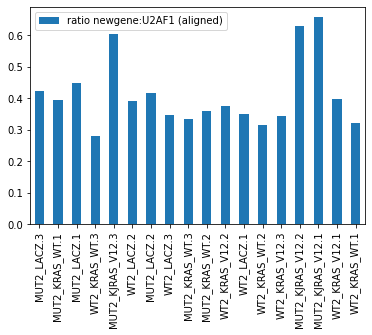

In [5]:
divided = [ ( i / j  ) for i, j in zip(primary_newgene, primary_u2af1)]
percent_df = pd.DataFrame(divided, index = new_names, columns = ['ratio newgene:U2AF1 (aligned)'])

percent_df.plot.bar()